In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [114]:
df = pd.read_csv('adult-all.csv', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label'], na_values='?', index_col=False)

In [115]:
df = df.dropna().reset_index(drop=True)
cat_cols = [c for c in df.columns if df[c].dtype=='object']
con_cols = [c for c in df.columns if df[c].dtype!='object']

In [119]:
onehot = OneHotEncoder(drop='first', sparse=False).fit(df[cat_cols])

In [120]:
test = onehot.transform(df[cat_cols])
test = pd.DataFrame(test, columns=onehot.get_feature_names(cat_cols))

In [121]:
test

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,label_>50K
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45218,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [104]:
df[con_cols]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
45217,33,245211,13,0,0,40
45218,39,215419,13,0,0,36
45219,38,374983,13,0,0,50
45220,44,83891,13,5455,0,40


In [122]:
df_onehot = pd.concat([df[con_cols], test], axis=1)

In [123]:
s = StandardScaler(with_std=True).fit(df_onehot[[c for c in df_onehot if c!='label_>50K']])

In [124]:
df_standardized = s.transform(df_onehot[[c for c in df_onehot if c!='label_>50K']])

In [126]:
df_standardized.shape

(45222, 96)

In [109]:
df_standardized.shape

(45222, 96)

In [134]:
import torch
torch.save([torch.from_numpy(df_standardized), torch.from_numpy(df_onehot['label_>50K'].astype('int8').to_numpy())], 'ds.pt')

In [146]:
df_onehot['label_>50K'].value_counts()

0.0    30242
1.0     9980
Name: label_>50K, dtype: int64

In [2]:
from sklearn.datasets import make_blobs, make_moons
X, y = make_moons(n_samples=500, random_state=0, noise=0.1)

In [12]:
import torch
torch.save([torch.from_numpy(X), torch.from_numpy(y)], 'ds_gaussian.pt')

In [13]:
y

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,

In [31]:
X.shape

(500, 2)

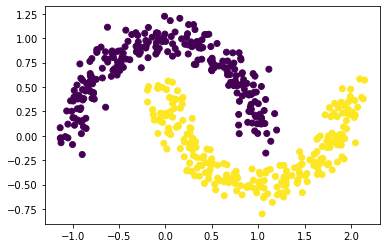

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],X[:, 1], c=y)
plt.show()

In [24]:
import numpy as np
generated = np.load('generated.npy')
inputs = np.load('inputs.npy')
targets = np.load('targets.npy')
gen_inputs_c = 

In [25]:
concat = np.concatenate((inputs, generated))
concat_targets = np.concatenate((targets, [2]*(len(concat)-len(targets))))

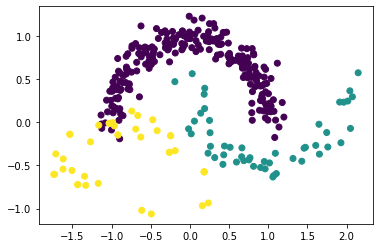

In [26]:
import matplotlib.pyplot as plt
plt.scatter(concat[:, 0],concat[:, 1], c=concat_targets+1)
plt.show()

In [1]:
import scipy.sparse as sp
import pickle
import pandas as pd
X, users_map, channels_map = (
        sp.load_npz("X_2.npz"),
        pickle.load(open("users_map.pkl", "rb")),
        pickle.load(open("channels_map.pkl", "rb")),
    )
channels = list(channels_map.keys())


In [2]:
X.shape

(119, 1)

In [24]:
df = pd.DataFrame(X.toarray(), columns=['watchtime_hrs'], index=channels)/3600
df.loc['total'] = [df['watchtime_hrs'].sum()]
df.sort_values(ascending=False, by='watchtime_hrs').head(50)

,watchtime_hrs
total,6646.854722
destinygg,3426.522500
bokoen,548.878889
masondota2,320.395833
destiny,274.254444
elajjaz,250.701667
sodapoppin,232.717778
cr1tdota,174.589444
giantwaffle,161.075000
admiralbahroo,112.704444
